In [1]:
__version__ = "$Revision$"  # SVN revision.
__date__ = "$Date$"         # Date of the last SVN revision.

# Matplotlib module is needed for this example.
# pyComtrade needs numpy.
import pyComtrade
import pylab
import pandas as pd
import csv
# Create an instance of the ComtradeRecord class and read the CFG file:
comtradeObj = pyComtrade.ComtradeRecord()

In [2]:
comtradeObj.read('./hbm_PBA_4 OSC 10_ 4 s.cfg', './hbm_PBA_4 OSC 10_ 4 s.dat')



In [3]:
print(comtradeObj.get_analog_ids())  # print the ids of the analog channels.

VAM;VBM;VCM;IBC2A;IBC2B;IBC2C


In [4]:
cabezeras=comtradeObj.get_analog_ids()
#cabezeras=pd.DataFrame(cabezeras)
print(cabezeras)

VAM;VBM;VCM;IBC2A;IBC2B;IBC2C


In [5]:
N = comtradeObj['endsamp'][-1]

print('Record has {} samples'.format(N))
print('Sampling rate is {} samples/sec.'.format(comtradeObj['samp'][-1]))

Record has 100000 samples
Sampling rate is 20000.0 samples/sec.


In [6]:
# Reading los canales analogos:
VAM = comtradeObj['A'][0]['values']
VBM = comtradeObj['A'][1]['values']
VCM = comtradeObj['A'][2]['values']
IA = comtradeObj['A'][3]['values']
IB = comtradeObj['A'][4]['values']
IC = comtradeObj['A'][5]['values']

# Reading time vector:
time = comtradeObj.get_timestamps()

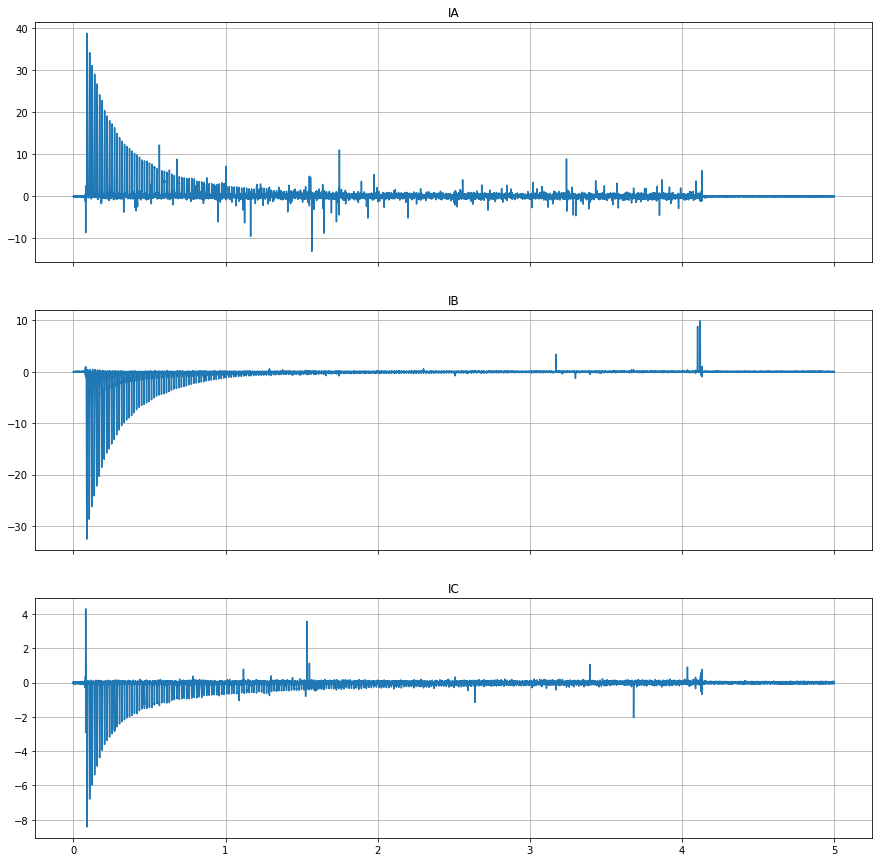

In [7]:
#Ploteamos corrientes
f, axarrI = pylab.subplots(3, sharex=True,figsize=(15, 15))

axarrI[0].plot(time, IA)
axarrI[0].set_title('IA')
axarrI[0].grid()

axarrI[1].plot(time, IB)
axarrI[1].set_title('IB')
axarrI[1].grid()

axarrI[2].plot(time, IC)
axarrI[2].set_title('IC')
axarrI[2].grid()



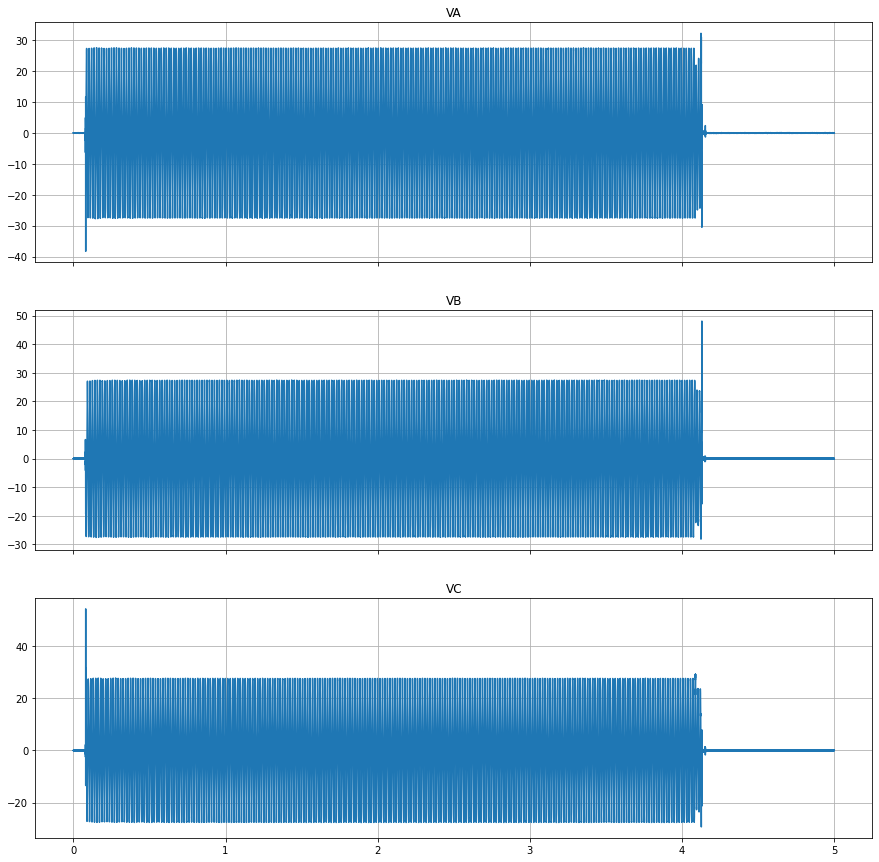

In [8]:
#ploteamos voltajes
f, axarrV = pylab.subplots(3, sharex=True,figsize=(15, 15))

axarrV[0].plot(time, VAM)
axarrV[0].set_title('VA')
axarrV[0].grid()

axarrV[1].plot(time, VBM)
axarrV[1].set_title('VB')
axarrV[1].grid()

axarrV[2].plot(time, VCM)
axarrV[2].set_title('VC')
axarrV[2].grid()



In [9]:
#Pasamos los datos a dataframes
IAdf = pd.DataFrame(IA)
IAdf.columns=["iA" ]

IBdf = pd.DataFrame(IB)
IBdf.columns=["iB" ]

ICdf = pd.DataFrame(IC)
ICdf.columns=["iC" ]

VAdf = pd.DataFrame(VAM)
VAdf.columns=["vA" ]

VBdf = pd.DataFrame(VBM)
VBdf.columns=["vB" ]

VCdf = pd.DataFrame(VCM)
VCdf.columns=["vC" ]

In [10]:
timedf=pd.DataFrame(time)
timedf.columns=["time" ]


In [11]:
salida = pd.concat([timedf,IAdf,IBdf, ICdf,VAdf,VBdf,VCdf], axis=1)
salida


,time,iA,iB,iC,vA,vB,vC
0,0.00000,-0.025641,-0.029203,-0.015478,0.007352,-0.052295,0.020929
1,0.00005,-0.016954,-0.002016,-0.033729,-0.044334,0.026791,0.085857
2,0.00010,-0.007478,0.016109,0.002578,0.033194,0.013998,0.020929
3,0.00015,-0.007478,0.025172,0.029954,0.046116,-0.025545,-0.043998
4,0.00020,0.020162,-0.020141,-0.024603,0.007352,0.001205,-0.043998
...,...,...,...,...,...,...,...
99995,4.99980,-0.025641,-0.002016,0.038885,0.057961,0.026791,0.033660
99996,4.99985,-0.007478,-0.020141,0.038885,-0.044334,-0.052295,-0.018537
99997,4.99990,-0.016954,0.007047,-0.033729,0.033194,0.053541,0.020929
99998,4.99995,-0.025641,0.016109,-0.006353,0.046116,-0.012752,-0.005806


In [12]:
#Exportar a txt

salida.to_csv('salida1.csv', sep=" ", 
          quoting=csv.QUOTE_NONE, escapechar=" ")